In [305]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from sklearn.metrics.pairwise import pairwise_distances


In [306]:
def gen_data(no_data, center_point, sd=0.1, dim=2):
    cov = np.diag([sd]*dim)
    return np.random.multivariate_normal(center_point, cov, no_data)

In [307]:
centers = [(-0.5,-0.2),(0,0.6),(0.5,0)]
training_data = []
for i in range(3):
    new_data = gen_data(30, centers[i] )
    training_data.append(new_data)
training_data = np.concatenate(training_data)

In [308]:
training_data.shape

(90, 2)

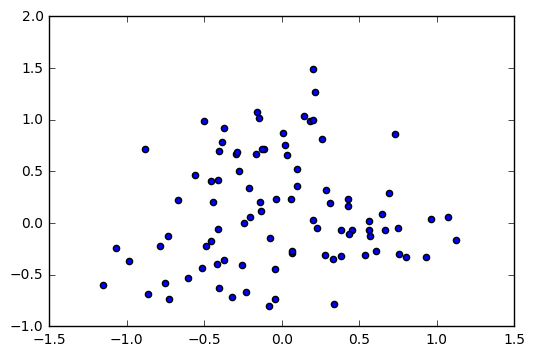

In [309]:
plt.scatter(training_data[:,0], training_data[:,1])

## b) Compute RBF Kernel

In [310]:
sd = 0.1
distance = pairwise_distances(training_data)
def computeRBF(data):
    return np.exp(-data/(2*sd**2))

training_rbf = computeRBF(distance) # now data span on 90 dimensions

print(training_rbf.shape)

(90, 90)


In [311]:
def centerize( df ):
    mean = np.mean( df, axis = 0 )
    centered = df - mean 
    return (centered, mean)

class PCA:
    def __init__(self, X):
        # X's shape (items,dimensions)
        (centered, self.means) = centerize(X)
        cov = np.cov( centered.T )

        (eig_values, eig_vectors) = np.linalg.eig(cov)

        eig_idx = np.argsort(-eig_values)
        (self.eig_values, self.eig_vectors) = (eig_values[eig_idx], eig_vectors[:,eig_idx])
        
    def project(self, X):
        # X's shape (items,dimensions)
        X = X - self.means
        return np.dot(X, self.eig_vectors)
    
    def reconstruct(self, X, eig_vectors_idx):
        res = np.dot( X, self.eig_vectors[:, eig_vectors_idx].T )
        res = res.T + self.means.reshape(len(self.means),1)
        return res.T

In [312]:
myPCA = PCA(training_rbf)

In [313]:
myPCA.eig_values[:5]

array([ 0.02392108,  0.02333916,  0.01987518,  0.01766689,  0.01369421])

In [314]:
myPCA.eig_vectors[0].shape

(90,)

## c) Visulize first 8 PCs in the 2-dimensional input

In [315]:
grid_space = 1.5
delta = 0.01

x = np.arange(-grid_space, grid_space + delta, delta)
y = np.arange(-grid_space, grid_space + delta, delta)
X, Y = np.meshgrid(x, y)

grid_points = len(X)
print(X.shape)
print(np.max(Y))

(301, 301)
1.5


In [316]:
test_data = np.hstack([X.reshape((grid_points**2,1)),Y.reshape((grid_points**2,1))])
print(test_data.shape)

(90601, 2)


In [317]:
test_data_rbf = list(map(lambda x: spanOnRBFDims(x, training_data), test_data ))
test_data_rbf = np.array(test_data_rbf).reshape( (len(test_data),90) )

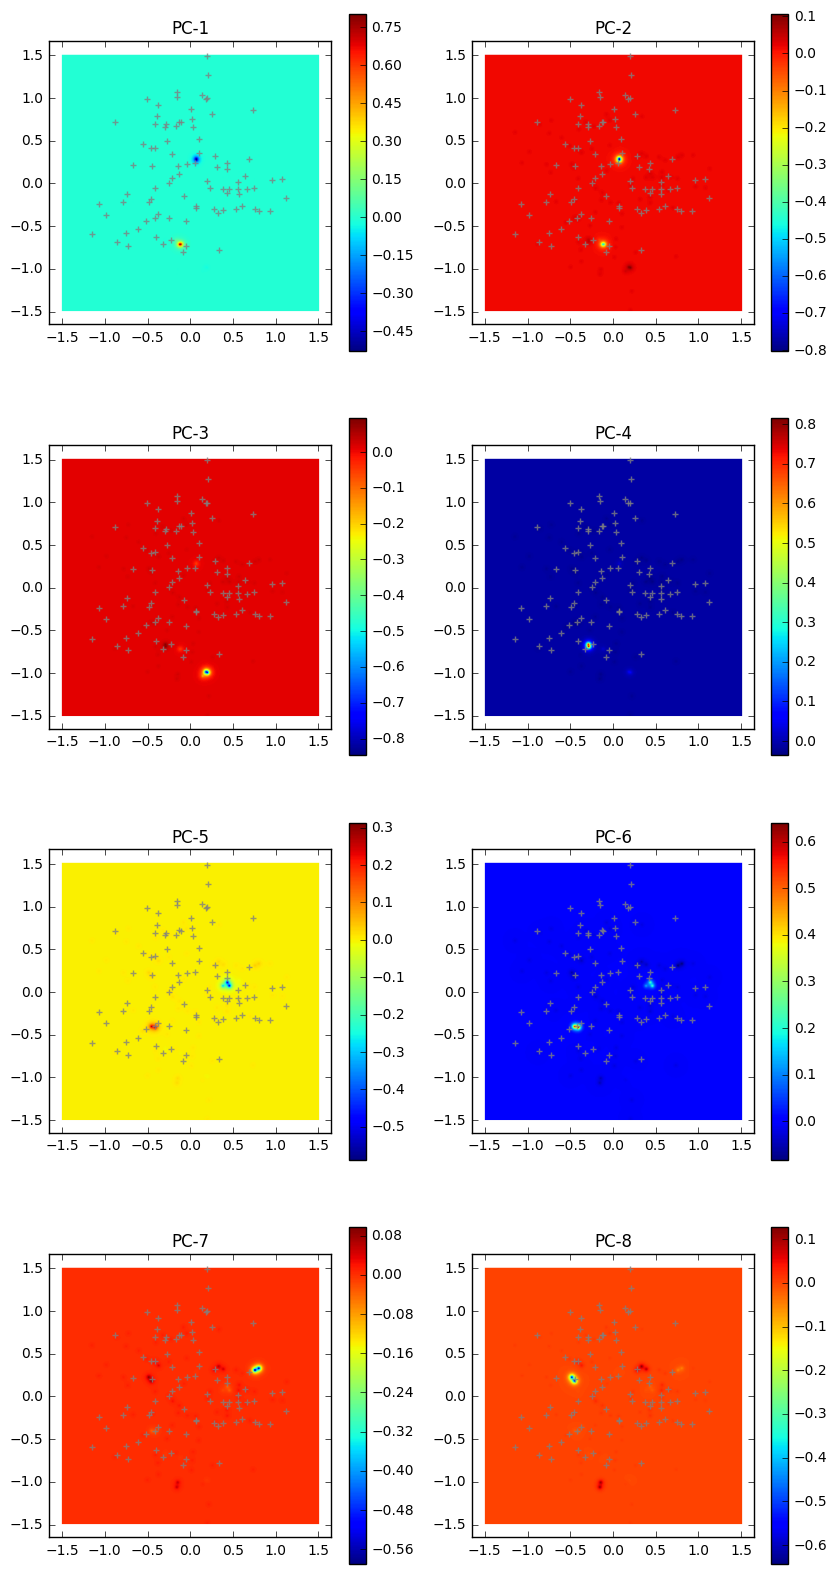

In [319]:
plt.figure(figsize=(10,20))
for i in range(8):
    Z = myPCA.project(test_data_rbf)[:,i].reshape((grid_points,grid_points))
    plt.subplot(4,2,i+1)
    plt.imshow(Z, extent=[-grid_space, grid_space, -grid_space, grid_space])
    plt.colorbar()
    plt.title("PC-%d" % (i+1))
    plt.scatter(training_data[:,0], training_data[:,1], color='grey', marker='+', alpha=0.8)